<a href="https://colab.research.google.com/github/dkssk2140/Test-notebook/blob/master/5%EC%9E%A5_%ED%9A%8C%EA%B7%80_03_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_20201008_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 경사 하강법

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

머신러닝 -> 지도 학습 -> 데이터와 답 입력 -> 학습 -> 식 찾기

경사하강법의 원리 이해를 위한 예제코드

y = 4X + 6 (역으로 식이 주어진 상태에서 데이터와 답 찾기)
1. 위 식에 근사한 데이터 생성 -> 2. 답 생성

경사하강 사용해서 위 식에 있는 계수를 도출
근사 처리하기 위해서 random 사용

Numpy Random function : 
  1. np.random.randint() : 정수 난수 생성(균일 분포를 따르는)
  2. np.random.rand()  : 0~1 사이의 실수 난수 생성(균일 분포 따르는)하여 matrix array 반환
  3. np.random.randn() : 표준 정규분포를 따르는 난수 생성하여 matrix array 반환
  4. np.random.shuffle() : 기존 데이터를 섞어서 순서 바꾸기
  5. np.random.choice() : 기존 데이터에서 샘플링

In [ ]:
# np.random.randint()
np.random.randint(6)   # 0부터 5까지 랜덤한 숫자 1개 반환

3

In [ ]:
# np.random.randint(start, end)
np.random.randint(1, 20)

12

In [ ]:
np.random.rand(3,2)  #3행 2열

array([[0.41293774, 0.2415316 ],
       [0.88670039, 0.08644477],
       [0.6308582 , 0.00237427]])

In [ ]:
# np.random.randn(개수) : 가우시안 표준 정규분포 따르는
np.random.randn(3,2)

array([[ 1.42499107, -1.95274035],
       [-1.06995148,  0.9034592 ],
       [ 0.32904536, -0.02942592]])

In [ ]:
# y = 4X + 6 (역으로 식이 주어진 상태에서 데이터와 답을 만들기)

np.random.seed(0)   # seed 고정
# 위 식을 근사한 Random 데이터 생성 : 실데이터를 모사하기 위해 임의로 노이즈를 생성하겠다 -> 랜덤을 이용
X = 2* np.random.rand(100,1)     #노이즈를 추가한 100개 행 데이터 생성
X[:10]

array([[1.09762701],
       [1.43037873],
       [1.20552675],
       [1.08976637],
       [0.8473096 ],
       [1.29178823],
       [0.87517442],
       [1.783546  ],
       [1.92732552],
       [0.76688304]])

In [ ]:
# y: 종속변수 => 답 생성
# y =4X+6
# 위에서 생성한 100개 난수 데이터 X 대입
# 생성할 답 y값에 노이즈 추가(노이즈 추가 안하면 해당 식 100% 정확도가 나와버림.말이 안됨)
y = 6 + 4*X + np.random.randn(100,1)

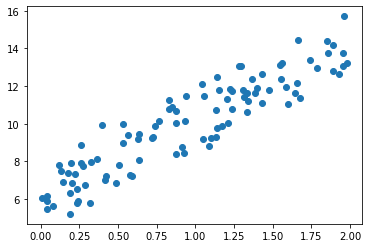

In [ ]:
# 만든 데이터 X: input, y:target 시각화
plt.scatter(X,y)

In [ ]:
# y = 4X + 6
# 오차 : 원래 값 y- 예측값(W0 + W1*X)

# 가중치 (W1, W0)를 업데이트 할 w1_update, w0_update 반환 함수 생성
def get_weigth_updates(w1,w0, X, y, learning_rate=0.01):
    N = len(y)   # y: 원래답의 길이 : 100
    # 먼저 반환할 값(w1,w0)을 저장할 배열 선언 (0으로 초기화)
    w1_update = np.zeros_like(w1)   # zeroes_like(a) : a와 동일한 구조의 배열 생성후 0으로 초기화해줌
    w0_update = np.zeros_like(w0)
    
    # 예측값(W0 + W1*X) 구하기 :  w1은 전치시킨 후 (w1.T :  Same as self.transpose().) W1*X 행렬 내적곱 dot()
    y_pred = w0 + np.dot(X, w1.T)
    
    # 오차 구하기
    diff = y - y_pred
    
    # w0 update를 행렬 연산하기 위한  1 값으로 초기화된 행렬 생성
    w0_fact = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate * (np.dot(X.T, diff))   # np.dot(X.T,diff) => 실제값 - 예측값
    w0_update = -(2/N)*learning_rate * (np.dot(w0_fact.T, diff))
    
    return w1_update, w0_update
    

In [ ]:
w1 = np.zeros_like(y)

In [ ]:
w1.shape, w1.T.shape

((100, 1), (1, 100))

In [ ]:
# 경사 하강 : 오차를 최소화하는 가중치값(w0, w1)를 구하는 것이 목적
# parameter : 데이터, 원래답, 반복 횟수
def gradient_descent_steps(X, y, iters=10000):
    # w0, w1 임의값으로 초기화: 여기서는 0 으로 초기화하기 (zeros)
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for idx in range(iters):
        # 이전 가중치 w - 수정된 가중치 (get_weight_update())
        w1_upd, w0_upd = get_weigth_updates(w1,w0, X, y, learning_rate=0.01)
        w1= w1 - w1_upd
        w0= w0 - w0_upd
    
    return w1,w0

# 10000 번 반복한 후 의 최종 가중치를 반환한다.

In [ ]:
# cost function 구하기
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N          # MSE 평균제곱 오차 방법으로 cost fuction 생성
    
    return cost

In [ ]:
# 위 함수 적용해서 최적화된 w1,w0구하기
w1, w0 = gradient_descent_steps(X, y, iters=1000)

In [ ]:
# w0 : 절편(원래값 : 6), w1 ; 기울기 (원래값: 4)
print('w1: {0:.3f}, w0 : {1:.3f}'.format(w1[0,0],w0[0,0]))

w1: 4.022, w0 : 6.162


In [ ]:
# 최적화로 찾은 가중치(w)를 적용한 식을 통해,
# 원래값 - 예측값 : 실제 얼마나 오차가 있는지 확인
y_pred= w0[0,0] + w1[0,0]*X
# 전체 오차
print('Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y,y_pred)))

Gradient Descent Total Cost : 0.9935


오차값 자체에서 의미를 찾기는 힘들다

시각화해서 확인해보기

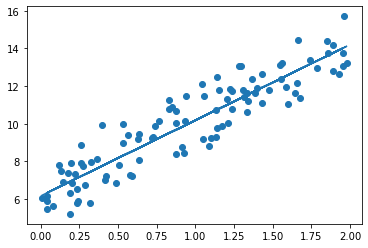

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred)

위에서 찾은 가중치(w)로 만들어진 회귀선(linear plot) 이 실제 데이터를 잘 따라가고 있음을 확인할 수 있다